<b>Section a

In [1]:
#Loading the data
import numpy as np
np.random.seed(42)
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
def fetch_mnist():
# Download MNIST dataset
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# Randomly sample 8000 images
    np.random.seed(2)
    indices = np.random.choice(len(X), 8000, replace=False)
    X, y = X[indices], y[indices]
    return X, y
X, y = fetch_mnist()
print(X.shape, y.shape)

(8000, 784) (8000,)


<b>Section b</b>

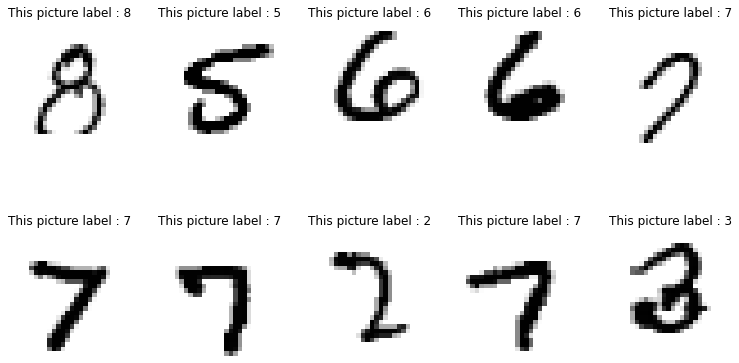

In [37]:
#Plotting the first 10 pictures from the data , doing it in two parts so you could see it clearly
#Plotting the first five pictures from the data
f,axarr = plt.subplots(2,5)
f.set_size_inches(13,7)
for i in range(5):
    axarr[0,i].imshow(np.reshape(X[i],(28,28)),cmap="binary")
    axarr[0,i].set_title('This picture label : ' +str(y[i]))
    axarr[1,i].imshow(np.reshape(X[i+5],(28,28)),cmap="binary")
    axarr[1,i].set_title('This picture label : ' +str(y[i+5]))
    axarr[0,i].axis("off")
    axarr[1,i].axis("off")

plt.show()
#help(f)

<b>Section c

In [37]:
#The cross_validation_error function from the last assignment
def cross_validation_error(X,y,model,folds):
    '''
    This function recieves a train data (nd array)
    a target values for the given data (1d array)
    the model in which it needs to classify
    and the number of folds of the cross validation.
    
    Then, it runs a cross validation , by dividing the data into k folds (given to it)
    and making a prediction on each fold at a time (training with the other folds).
    it returns a tuple of the average train error, and average test error.
    '''
    k = 0
    i = 0
    test_error = []
    train_error = []
    while (k<folds):
        X_test = X[int(i):int((len(X))/folds)+int(i),:]
        X_train = np.delete(X, np.arange(int(i), stop=int((len(X))/folds)+int(i)), 0)
        Y_test = y[int(i):int((len(X))/folds)+int(i)]
        Y_train = np.delete(y, np.arange(int(i), stop=int((len(X))/folds)+int(i)))
        model.fit(X_train,Y_train)
        test_prediction = model.predict(X_test)
        train_prediction = model.predict(X_train)
        test_error.append(np.count_nonzero(np.array(test_prediction)!=Y_test)/len(Y_test))
        train_error.append(np.count_nonzero(np.array(train_prediction)!=Y_train)/len(Y_train))
        k = k+1
        i = i+int(len(X)/folds)
    average_train_error = (1/folds)*np.sum(np.array(train_error))
    average_val_error = (1/folds)*np.sum(np.array(test_error))
    return (average_train_error,average_val_error)      

In [77]:
from sklearn.svm import SVC
def SVM_results(X_train, y_train, X_test, y_test):
    '''
    This function runs speciefic svm models on train set.
    It returns a dictionary with the erros produced by evaluation of cross validation and by a test set
    '''
    dict_of_errors ={}
    poly_errors = []
    RBF_erros = []
    test_erorrs = []
    k = 0
    j = 1
    d_vec = [2,4,6,8,10]
    gama_vec = [0.001,0.01,0.1,1,10]
    linear_default_kernel_error = cross_validation_error(X_train,y_train,SVC(kernel='linear',C = 1),5)
    test_erorrs.append(1-SVC(kernel='linear').fit(X_train,y_train).score(X_test, y_test))
    dict_of_errors["SVM_linear"] = (linear_default_kernel_error[0],linear_default_kernel_error[1],test_erorrs[0])
    for d in d_vec:
        poly_errors.append(cross_validation_error(X_train,y_train,SVC(kernel='poly',degree = d),5))
        test_erorrs.append(1-SVC(kernel='poly',degree = d).fit(X_train,y_train).score(X_test,y_test))
        dict_of_errors["SVM_poly_" + str(d)] = (poly_errors[k][0],poly_errors[k][1],test_erorrs[j])
        k+=1
        j+=1
    k = 0
    j = len(test_erorrs) 
    for gama in gama_vec:
        RBF_erros.append(cross_validation_error(X_train,y_train,SVC(kernel='rbf',gamma = gama),5))
        test_erorrs.append(1-SVC(kernel='rbf',gamma = gama).fit(X_train,y_train).score(X_test,y_test))
        dict_of_errors["SVM_rbf_" + str(gama)] = (RBF_erros[k][0],RBF_erros[k][1],test_erorrs[j])
        k+=1
        j+=1        
    return dict_of_errors



<b> Section d
   

In [78]:
#Splitting the data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#calling the function that returns the errors dictionary
errors = SVM_results(X_train, y_train, X_test, y_test)
errors

{'SVM_linear': (0.0, 0.08875, 0.08937499999999998),
 'SVM_poly_2': (0.017812500000000002,
  0.05281250000000001,
  0.050000000000000044),
 'SVM_poly_4': (0.027773437499999998, 0.085, 0.07999999999999996),
 'SVM_poly_6': (0.09363281250000002, 0.185, 0.1775),
 'SVM_poly_8': (0.15675781249999998, 0.29406250000000006, 0.28125),
 'SVM_poly_10': (0.2004296875, 0.37203125000000004, 0.34875),
 'SVM_rbf_0.001': (0.0, 0.88859375, 0.8981250000000001),
 'SVM_rbf_0.01': (0.0, 0.88859375, 0.8981250000000001),
 'SVM_rbf_0.1': (0.0, 0.88859375, 0.8981250000000001),
 'SVM_rbf_1': (0.0, 0.88859375, 0.8981250000000001),
 'SVM_rbf_10': (0.0, 0.88859375, 0.8981250000000001)}

Text(0, 0.5, 'error rates')

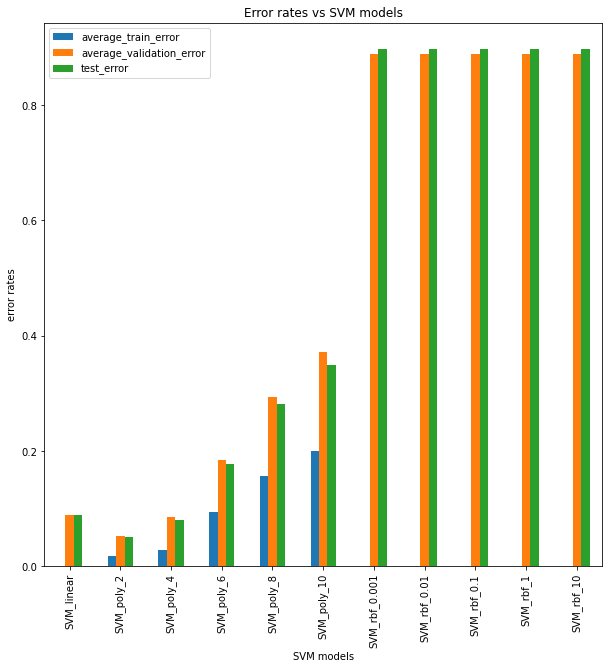

In [84]:
#plotting the errors we got 
errors_data = pd.DataFrame(errors)
errors_data = errors_data.rename(index={0: "average_train_error", 1: "average_validation_error" ,
                                        2: "test_error"})
ax = errors_data.T.plot(kind= 'bar',figsize = (10,10),title = 'Error rates vs SVM models')
ax.set_xlabel("SVM models")
ax.set_ylabel("error rates")

We can see by the graph, that the model that gives the lowest errors is the "SVM POLY 2" and it does that for the test of the cross validation, and also the test error. So it is the best model from those above. As for the train, there are several models which gives zero error (Over fitting)